In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

!pip install -U openpyxl

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [2]:
import pandas as pd

df = pd.read_excel("/content/fake_news.xlsx")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,43
label,0


In [5]:
df = df.dropna()
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [6]:
df.shape

(18281, 5)

In [7]:
df['label'].value_counts()

,count
label,
0,10361
1,7920


Dataset Analysis

In [8]:
import matplotlib.pyplot as plt


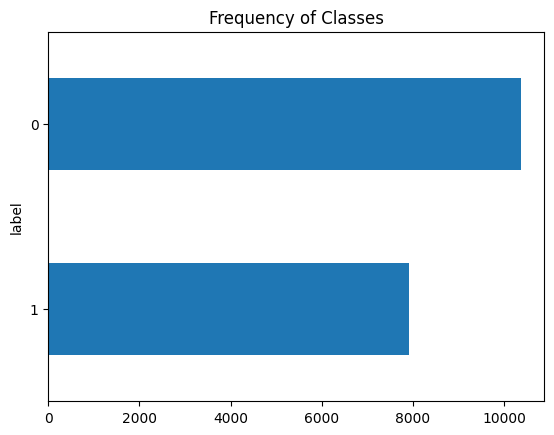

In [9]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [10]:
#1.5 tokens per word on average
df['title_tokens']=df['title'].apply(lambda x: len(x.split())*1.5)
df['text_tokens']=df['text'].apply(lambda x: len(x.split())*1.5)

df

,id,title,author,text,label,title_tokens,text_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,21.0,1230.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,13.5,1065.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,10.5,1899.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15.0,835.5
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,21.0,231.0
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,13.5,460.5
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,16.5,1680.0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,22.5,1201.5
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,12.0,400.5


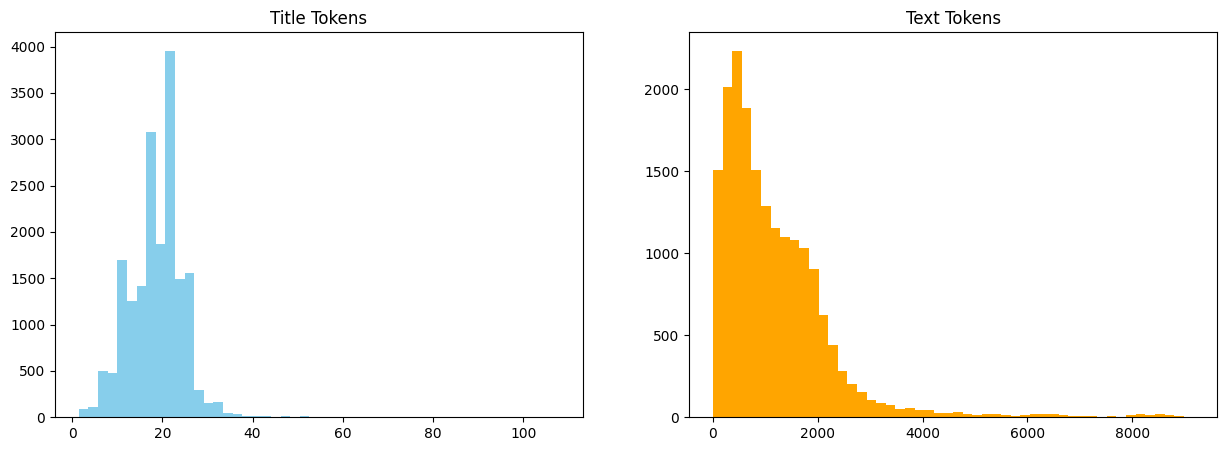

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(df['title_tokens'],bins=50,color='skyblue')
ax[0].set_title('Title Tokens')

ax[1].hist(df['text_tokens'],bins=50,color='orange')
ax[1].set_title('Text Tokens')

plt.show()

Data Loader and Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

#70% for training, 20% test, 10% validation
train, test = train_test_split(df, test_size=0.3,stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3,stratify=test['label'])

train.shape, validation.shape, test.shape,df.shape

((12796, 7), (1829, 7), (3656, 7), (18281, 7))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12796 entries, 2858 to 253
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12796 non-null  int64  
 1   title         12796 non-null  object 
 2   author        12796 non-null  object 
 3   text          12796 non-null  object 
 4   label         12796 non-null  int64  
 5   title_tokens  12796 non-null  float64
 6   text_tokens   12796 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 799.8+ KB


In [14]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
    'train': Dataset.from_pandas(train, preserve_index=False),
    'test': Dataset.from_pandas(test, preserve_index=False),
    'validation': Dataset.from_pandas(validation, preserve_index=False)
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 3656
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 1829
    })
})

Data Tokenization

In [15]:
from transformers import AutoTokenizer

text = 'Machine Learning is awesome! ! Thanks KGP Talkie.'

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokens = distilbert_tokenizer.tokenize(text)

model_ckpt = "google/mobilebert-uncased"
mobilebert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
mobilebert_tokens = mobilebert_tokenizer.tokenize(text)

model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"
tinybert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tinybert_tokens = tinybert_tokenizer.tokenize(text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [16]:
distilbert_tokenizer,mobilebert_tokenizer,tinybert_tokenizer

(DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 },
 MobileBertTokenizerFast(name_or_path='google/mobilebert-uncased', vocab_size=30522, model_max_length=1000

In [17]:
def tokenize(batch):
  temp = distilbert_tokenizer(batch['title'], padding=True, truncation=True)
  return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 5074, 9932, 4244, 1010, 9177, 21625, 22226, 25769, 3206, 1010, 14616, 2005, 18010, 1011, 1996, 2047, 2259, 2335, 102], [101, 16450, 1996, 17716, 3203, 8509, 1520, 2540, 1998, 3969, 1521, 2046, 2346, 15872, 1011, 1996, 2047, 2259, 2335, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [18]:
encoded_dataset = dataset.map(tokenize, batched=True, batch_size=None)
encoded_dataset

Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 12796
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 3656
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 1829
    })
})

Model Building

In [19]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

label2id = {"Real": 0, "Fake": 1}
id2label = {0: "Real", 1: "Fake"}

model_ckpt = "distilbert-base-uncased"
#model_ckpt = "google/mobilebert-uncased"
#model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,config=config).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.config.id2label

{0: 'Real', 1: 'Fake'}

In [21]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.46.3",
  "vocab_size": 30522
}

Evaluator

In [22]:
#Build compute Metrics function
!pip install evaluate
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00


In [23]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate = 2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay = 0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
)

In [24]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    compute_metrics = compute_metrics_evaluate,
    train_dataset = encoded_dataset['train'],
    eval_dataset = encoded_dataset['validation'],
    tokenizer = distilbert_tokenizer,
)

In [25]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,0.226200
1000,0.178600
1500,0.151500
2000,0.084300
2500,0.077000
3000,0.066400
3500,0.045500
4000,0.022000
4500,0.029300


TrainOutput(global_step=4800, training_loss=0.09242010538776715, metrics={'train_runtime': 511.8224, 'train_samples_per_second': 75.003, 'train_steps_per_second': 9.378, 'total_flos': 953467218676224.0, 'train_loss': 0.09242010538776715, 'epoch': 3.0})

Model Evaluation

In [26]:
preds_output = trainer.predict(encoded_dataset['test'])

In [27]:
preds_output

PredictionOutput(predictions=array([[-4.426171 ,  4.10752  ],
       [ 3.8607535, -3.9005613],
       [ 5.509847 , -5.519833 ],
       ...,
       [-4.322917 ,  4.068445 ],
       [-4.2892284,  3.946162 ],
       [ 4.6640368, -4.7513056]], dtype=float32), label_ids=array([1, 0, 0, ..., 1, 1, 0]), metrics={'test_loss': 0.21282365918159485, 'test_accuracy': 0.9617067833698031, 'test_runtime': 10.0771, 'test_samples_per_second': 362.803, 'test_steps_per_second': 45.35})

In [28]:
preds_output.metrics

{'test_loss': 0.21282365918159485,
 'test_accuracy': 0.9617067833698031,
 'test_runtime': 10.0771,
 'test_samples_per_second': 362.803,
 'test_steps_per_second': 45.35}

In [29]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.97      0.96      0.97      2072
        Fake       0.95      0.96      0.96      1584

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656



Benchmarking

In [31]:
#Use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {"accuracy": acc, "f1": f1}

In [32]:
model_dict = {
    "bert-base": "bert-base-uncased",
    "distilbert": "distilbert-base-uncased",
    "mobilebert": "google/mobilebert-uncased",
    "tinybert": "huawei-noah/TinyBERT_General_4L_312D"
}

def train_model(model_name):
  model_ckpt = model_dict[model_name]
  tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
  config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
  model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

  def local_tokenizer(batch):
    temp = tokenizer(batch['title'], padding=True, truncation=True)
    return temp

  encoded_dataset = dataset.map(local_tokenizer, batched=True, batch_size=None)

  trainer = Trainer(
              model = model,
              compute_metrics = compute_metrics_evaluate,
              train_dataset = encoded_dataset['train'],
              eval_dataset = encoded_dataset['validation'],
              tokenizer = tokenizer,
          )

  trainer.train()

  preds = trainer.predict(encoded_dataset['test'])

  return preds.metrics


import time
model_performance = {}
for model_name in model_dict:
    print("\n\n")
    print("Training Model: ", model_name)

    start = time.time()
    result = train_model(model_name)
    end = time.time()

    model_performance[model_name] = {model_name:result, "time taken": end-start}






Training Model:  bert-base


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

Step,Training Loss
500,0.283800
1000,0.259800
1500,0.217800
2000,0.145200
2500,0.156700
3000,0.146000
3500,0.110400
4000,0.085900
4500,0.087500





Training Model:  distilbert


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

Step,Training Loss
500,0.232400
1000,0.174900
1500,0.159400
2000,0.083100
2500,0.080300
3000,0.070000
3500,0.047900
4000,0.020100
4500,0.034600





Training Model:  mobilebert


pytorch_model.bin:   0%|          | 0.00/147M [00:00<?, ?B/s]

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

Step,Training Loss
500,50550.332000
1000,0.240300
1500,0.178700
2000,0.152100
2500,0.113200
3000,0.099300
3500,0.071900


Step,Training Loss
500,50550.332000
1000,0.240300
1500,0.178700
2000,0.152100
2500,0.113200
3000,0.099300
3500,0.071900
4000,0.048200
4500,0.056500





Training Model:  tinybert


pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12796 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1829 [00:00<?, ? examples/s]

Step,Training Loss
500,0.315100
1000,0.225500
1500,0.200200
2000,0.144100
2500,0.134200
3000,0.130700
3500,0.110700
4000,0.094600
4500,0.073400


In [33]:
model_performance

{'bert-base': {'bert-base': {'test_loss': 0.18449170887470245,
   'test_accuracy': 0.9617067833698031,
   'test_runtime': 19.637,
   'test_samples_per_second': 186.179,
   'test_steps_per_second': 23.272},
  'time taken': 911.1963913440704},
 'distilbert': {'distilbert': {'test_loss': 0.21468406915664673,
   'test_accuracy': 0.9619803063457331,
   'test_runtime': 10.0682,
   'test_samples_per_second': 363.123,
   'test_steps_per_second': 45.39},
  'time taken': 499.31474018096924},
 'mobilebert': {'mobilebert': {'test_loss': 0.2561132311820984,
   'test_accuracy': 0.9597921225382933,
   'test_runtime': 19.7964,
   'test_samples_per_second': 184.68,
   'test_steps_per_second': 23.085},
  'time taken': 914.8843491077423},
 'tinybert': {'tinybert': {'test_loss': 0.2165813148021698,
   'test_accuracy': 0.9584245076586433,
   'test_runtime': 2.9619,
   'test_samples_per_second': 1234.332,
   'test_steps_per_second': 154.291},
  'time taken': 118.00529408454895}}

Model Load and Save

In [34]:
trainer.save_model("fake_news")

In [35]:
from transformers import pipeline

classifier = pipeline("text-classification", model="fake_news")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [39]:
classifier('i love you')

[{'label': 'Fake', 'score': 0.9995997548103333}]